english version: WIP

In [0]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('seaborn-darkgrid')

Using TensorFlow backend.


# LEITURA DE **DADOS**

---



Nessa parte serão realizados os seguintes passos:


*   Transformar os csv disponivel no Git em um dataframe do pandas
*   Separar em  4 dataframes diferentes: 
      1.   Brasil
      2.   Estados Unidos
      3.   Suécia
      4.   Itália


*   Remover partes do dataframe que não serão usadas
*   iremos utilizar 3 dataframe para cada país: Confirmados, Mortes e Recuperados








In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [0]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,484
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19


In [0]:
# separando os dataframes globais em dataframes locais

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [0]:
df_confirmados_brasil.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092


In [0]:
df_confirmados_italia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626


In [0]:
df_confirmados_eua.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,188172,213372,243762,275586,308853,337072,366667,396223,429052,461437


In [0]:
df_confirmados_suecia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
205,NaN,Sweden,63.0,16.0,0,0,0,0,0,0,...,4435,4947,5568,6131,6443,6830,7206,7693,8419,9141


In [0]:
# Fazendo com que todos os df comecem apenas 1 dia antes do 1º casi de covid 
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# TRATANDO OS DADOS 

Tendo em vista que o algoritmo de aprendizado de maquina não aceita datas no formato MM/DD/AA, nos iremos realizar alguns tratamentos nesses dataframes para conseguir o que queremos, realizaremos os seguinte passos:


*   Extrairemos os index das colunas
*   Extrairemos os numeros de casos de cada país
*   transformaremos as datas em dias corridos, 1º dia do covid = 0, segundo = 1,etc..
*   Escolheremos em quantos dias corridos no futuro queremos fazer a predição
*   transformaremos os dias corridos em datas mm/dd/yy
*   Transpor todos os dataframes









In [0]:
# pegando o indice das colunas:
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# pegando os valores de todos df do brasil para auxiliar em construções de graficos:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# realizando o mesmo processo anterior para o eua
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# realizando o mesmo processo anterior para a italia
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# realizando o mesmo processo anterior para a suecia
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transformando as datas em um numpy array de dias corridos:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 40 # essa variavel define quantos dias para frente a partir de hoje queremos prever.
# fazendo  datas futuras em numpy array de dias corridos 
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transformando datas futuras corridas em datas de formato mm/dd/yy
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transpondo todos os dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [0]:
df_confirmados_brasil.head()


,28,dates
2/26/20,1,2/26/20
2/27/20,1,2/27/20
2/28/20,1,2/28/20
2/29/20,2,2/29/20
3/1/20,2,3/1/20


In [0]:
# como vimos os index estão errados, iremos arrumar-los agora.
df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

abaixo, visualizaremos os dataframes transposto

In [0]:
df_confirmados_brasil.head()

,cases,dates
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4


In [0]:
df_mortes_eua.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df_recuperados_suecia.head()

,recovery,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df_mortes_italia.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


a parte de separar target de dados, e de separar em train e test será feita na secao de predicao

# APRESENTAÇÃO GRAFICOS

Nessa seção apenas sera apresentados alguns graficos que nos ajudara a entender como anda a situacao do covid-19 nos 4 paises selecionados

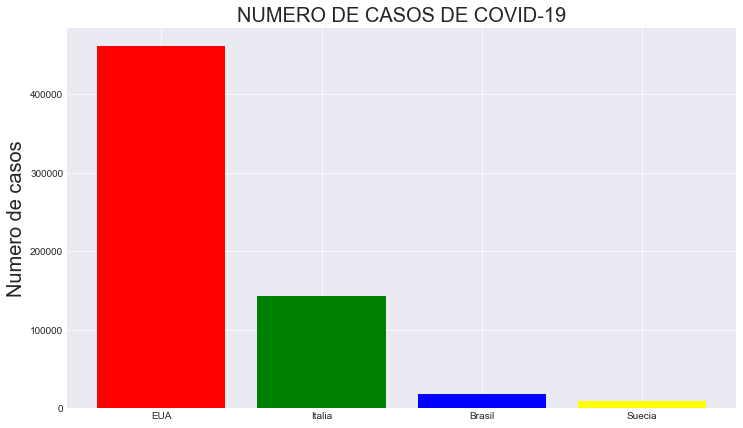

In [0]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

plt.ylabel('Numero de casos', size = 20)
plt.title('NUMERO DE CASOS DE COVID-19', size=20)
plt.show()

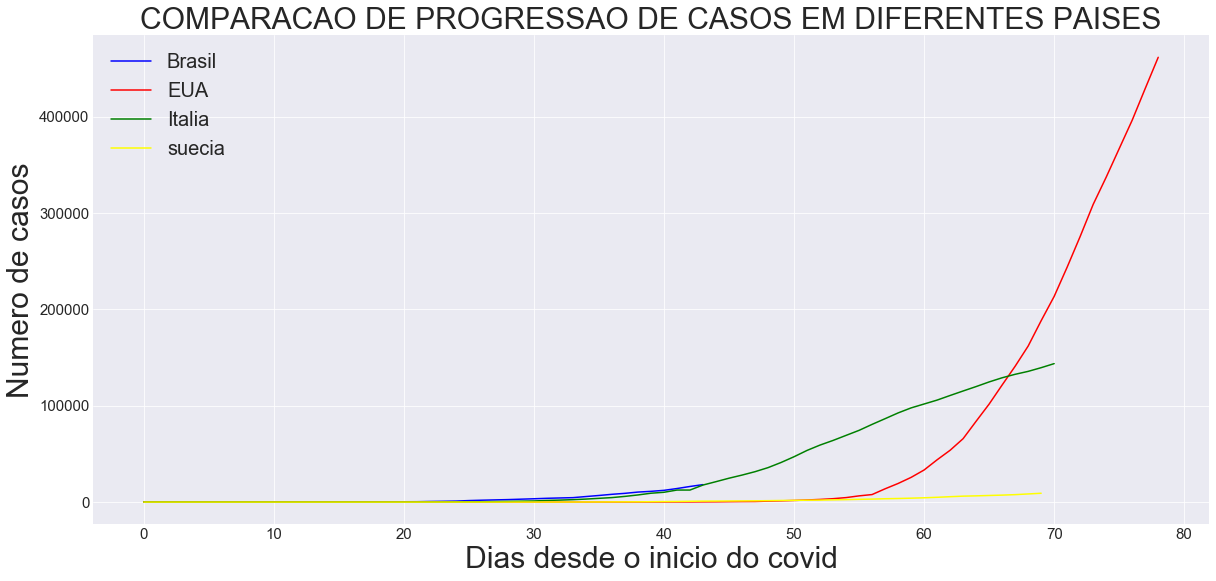

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


A suecia parece quase que uma linha reta ao se comparar com EUA e italia, o Brasil tambem esta bem discreto  ao lado de italia e EUA, a frente iremos comparar esses paises 2 a 2

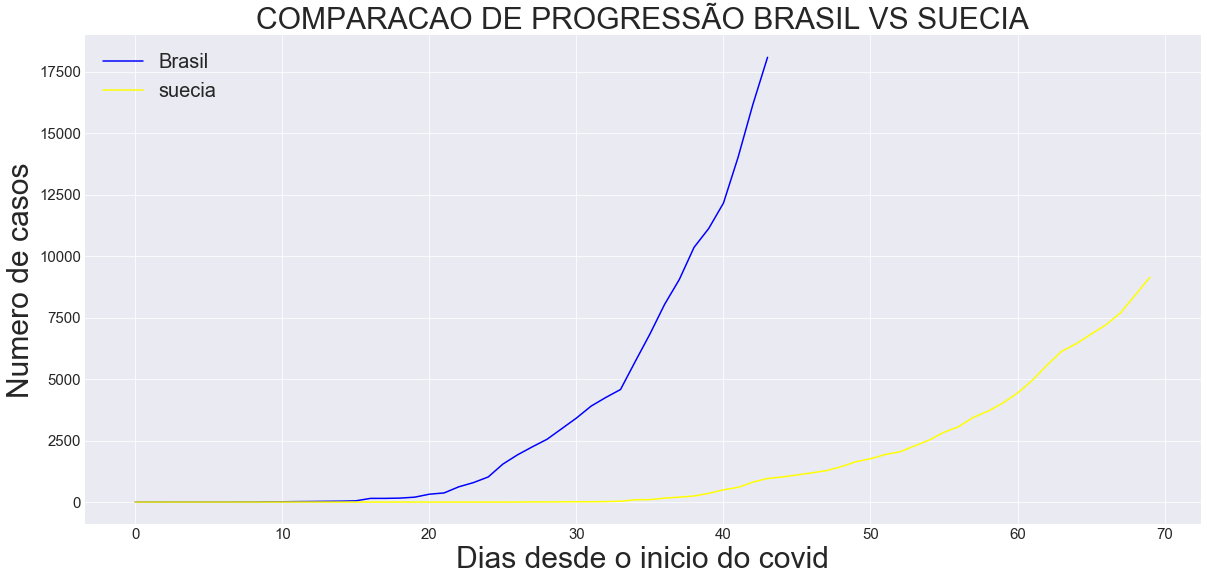

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


como reparamos o covid demorou mais para começar a crescer na suecia do que no brasil

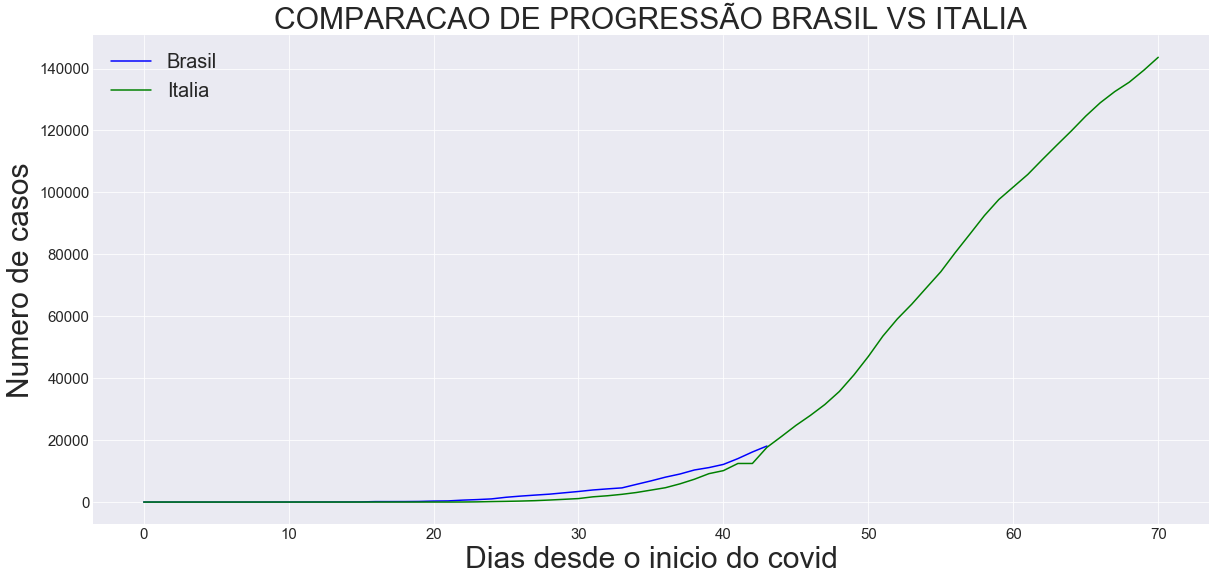

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_italia, casos_italia, color='green')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Nao podemos esquecer que o brasil tem populacao maior que a da italia, para numeros reais precisariamos do percentual, que sera realizado mais para frente.

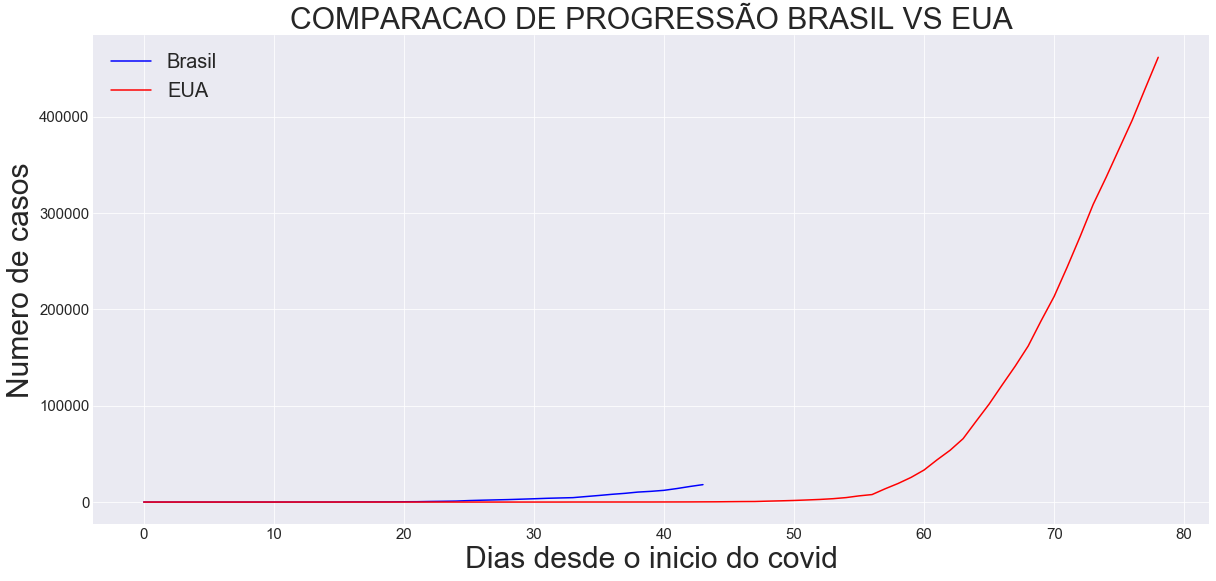

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


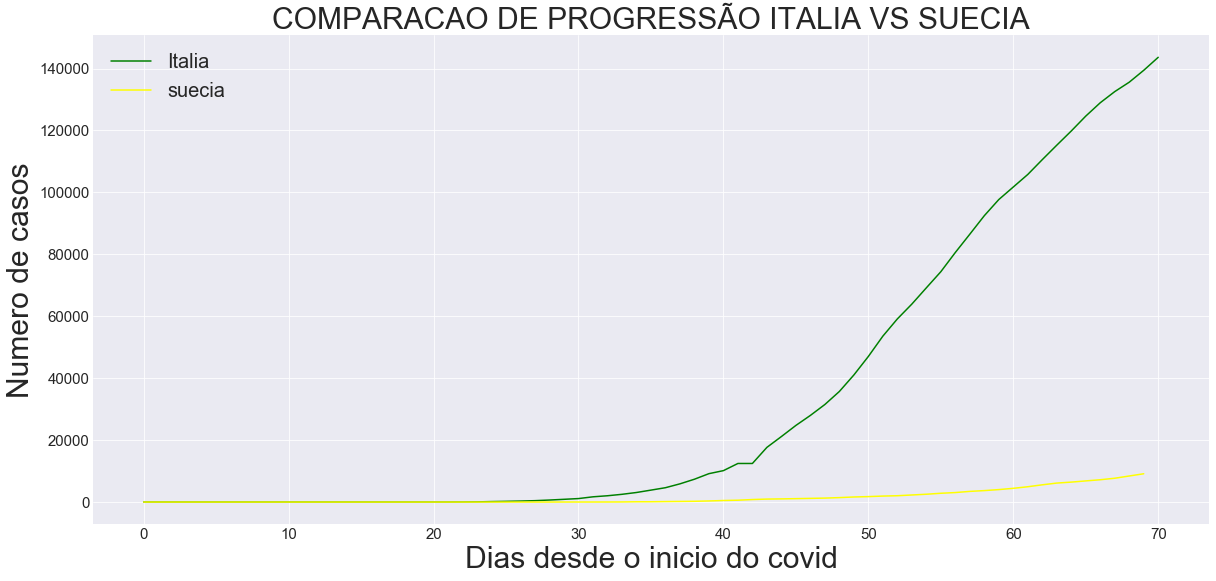

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


mesmo caso da italia, precisamos de um percentual para saber como realmente esta

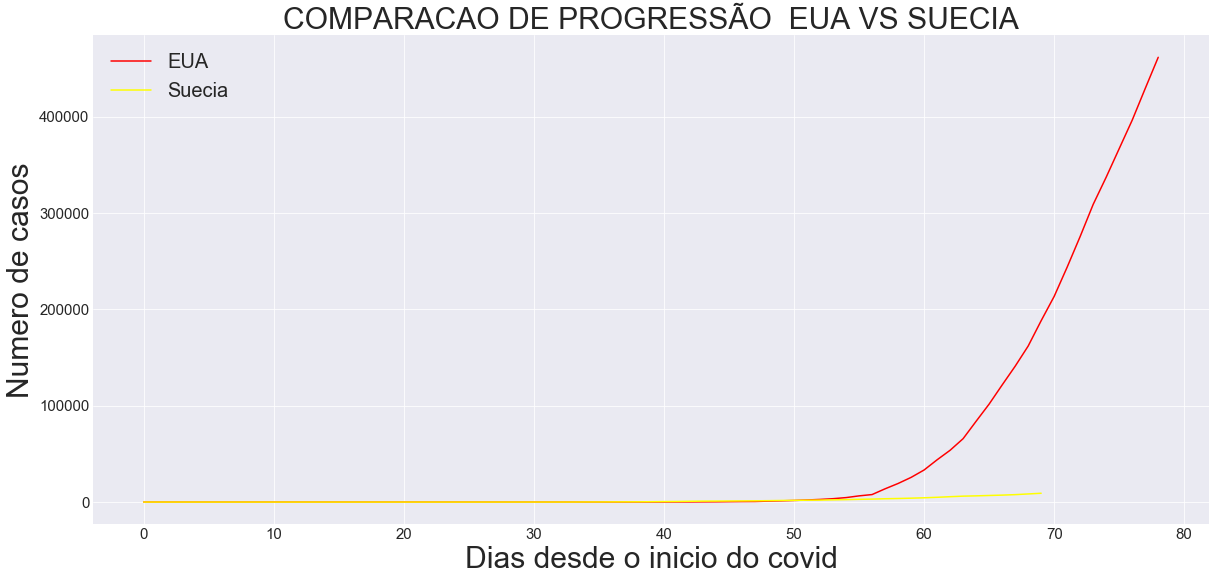

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO  EUA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['EUA', 'Suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


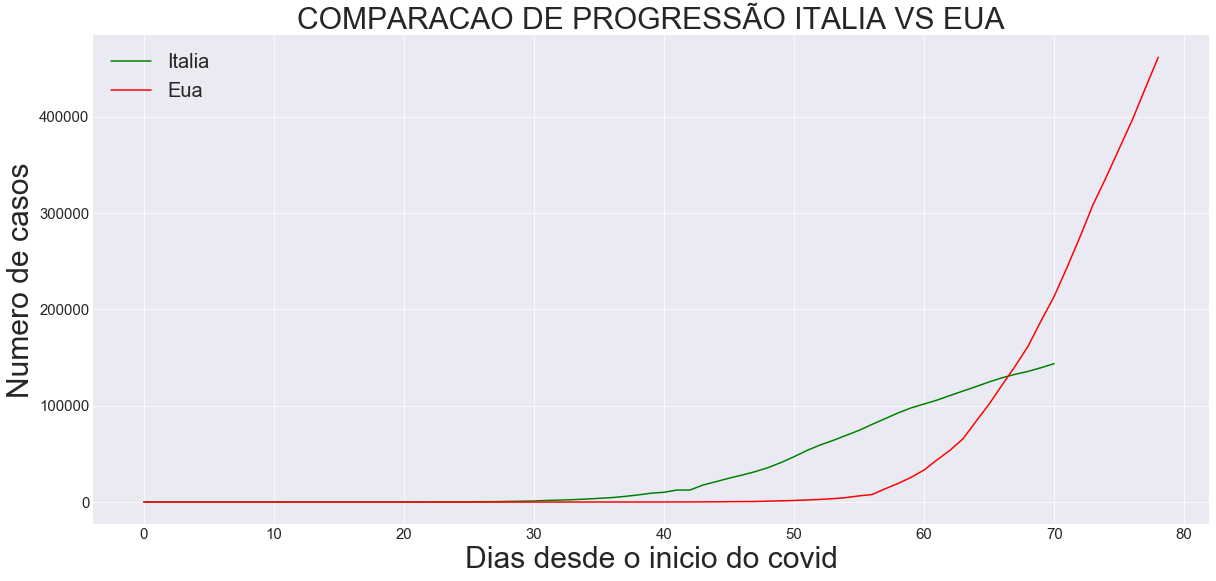

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_eua, casos_eua, color='red')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


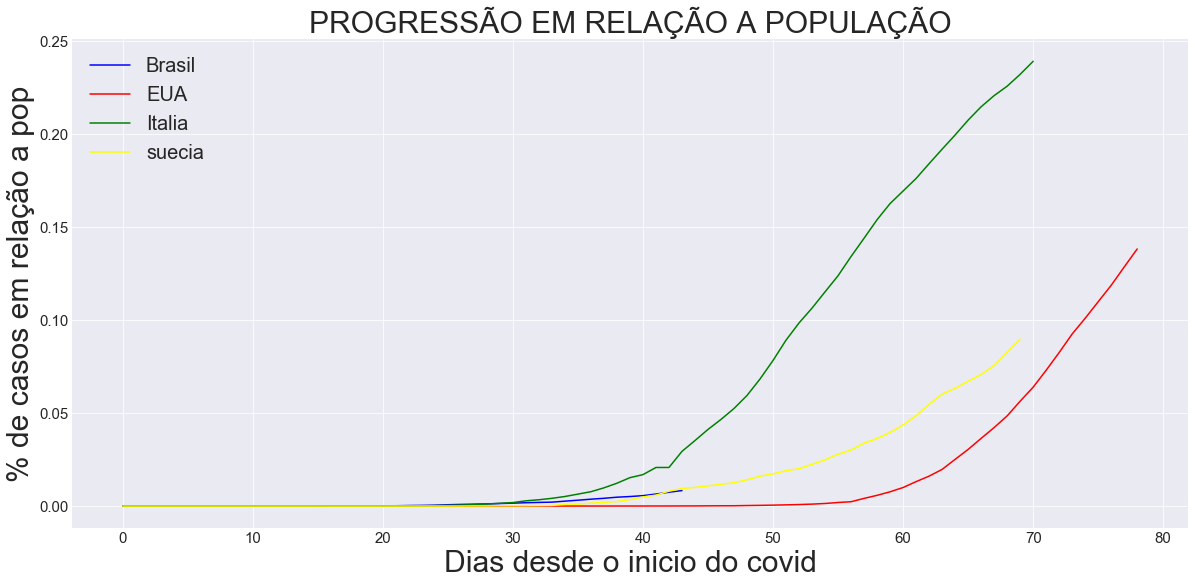

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


 **O QUE PODE-SE REPARAR ATRAVEZ DESSES GRAFICOS DE CASOS:**
*   Os Estados Unidos teve uma grande queda no numero de casos
*   A italia esta partindo para a estabilização


*   A suecia assim como o Brasil esta em sua subida, apesar de a suecia ter demorado mais, se assemelha mto com o brasil
*   **Quando usamos porcentagem de população o Brasil eh oq menos tem casos**, e esta crescendo em um ritmo igual ao da suecia, logo espera-se que ate o 70º dia o Brasil tenha + ou -  172 mil casos
*   O Brasil assim como a suecia, tendem a ter mais casos percentuais doq os Estados Unidos
*   A Italia cresceu de forma muito grande percentualmente






repetiremos os mesmos graficos para mortes, e depois faremos graficos de mortes vs recuperados

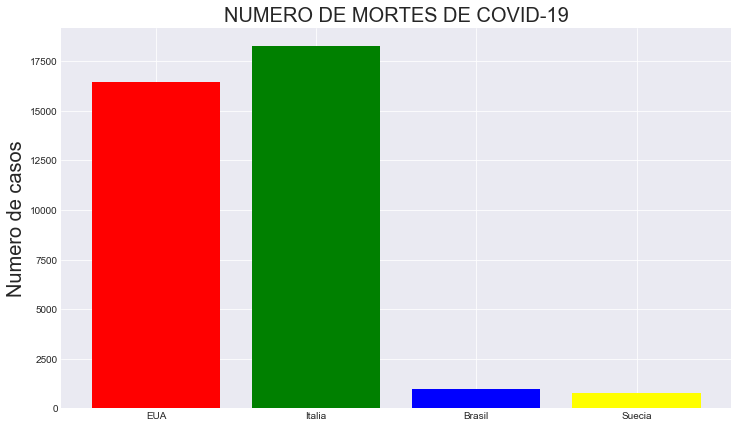

In [0]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [mortos_eua,mortos_italia,mortos_brasil, mortos_suecia]
plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

plt.ylabel('Numero de casos', size = 20)
plt.title('NUMERO DE MORTES DE COVID-19', size=20)
plt.show()

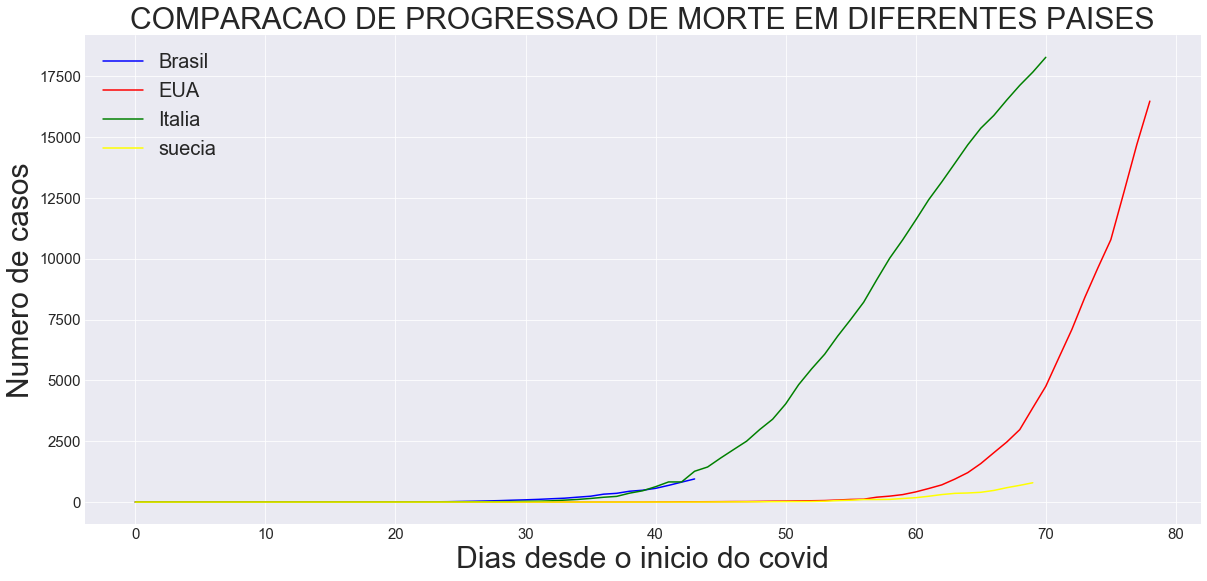

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


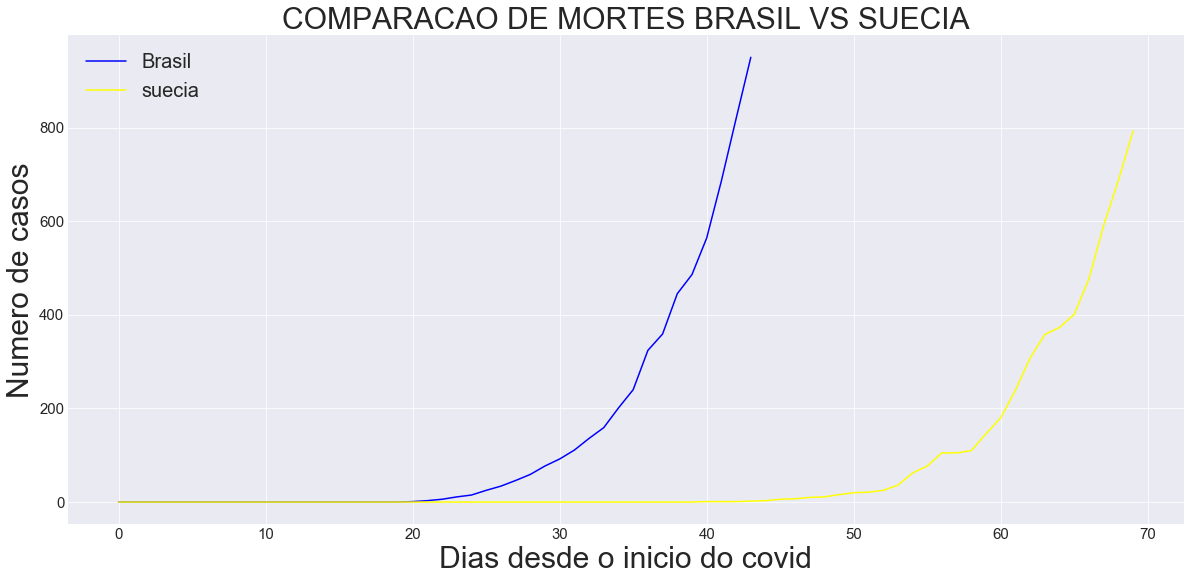

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_suecia, mortes_suecia, color='yellow')


plt.title('COMPARACAO DE MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


a curva de mortes dos dois paises se parecem muito, com  a diferenca que a do Brasil comecou a subir antes

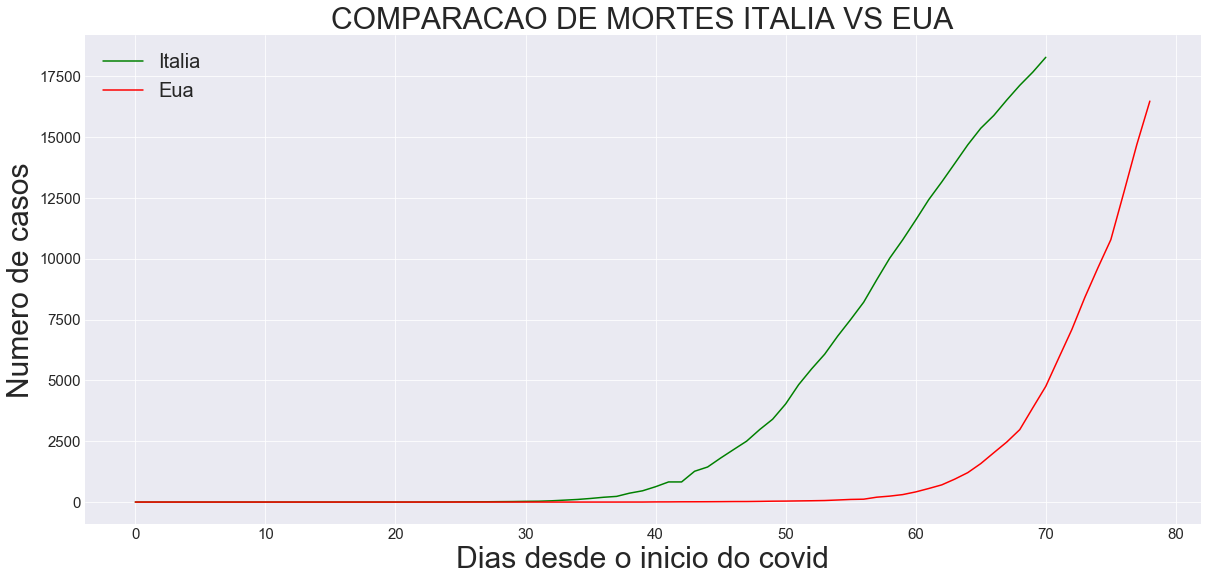

In [0]:
plt.figure(figsize=(20, 9) Oi)
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_eua, mortes_eua, color='red')


plt.title('COMPARACAO DE MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


vemos que a italia esta diminuindo os casos de morte, sua curva esta sendo "achatada", enquanto os eua estao so aumentando

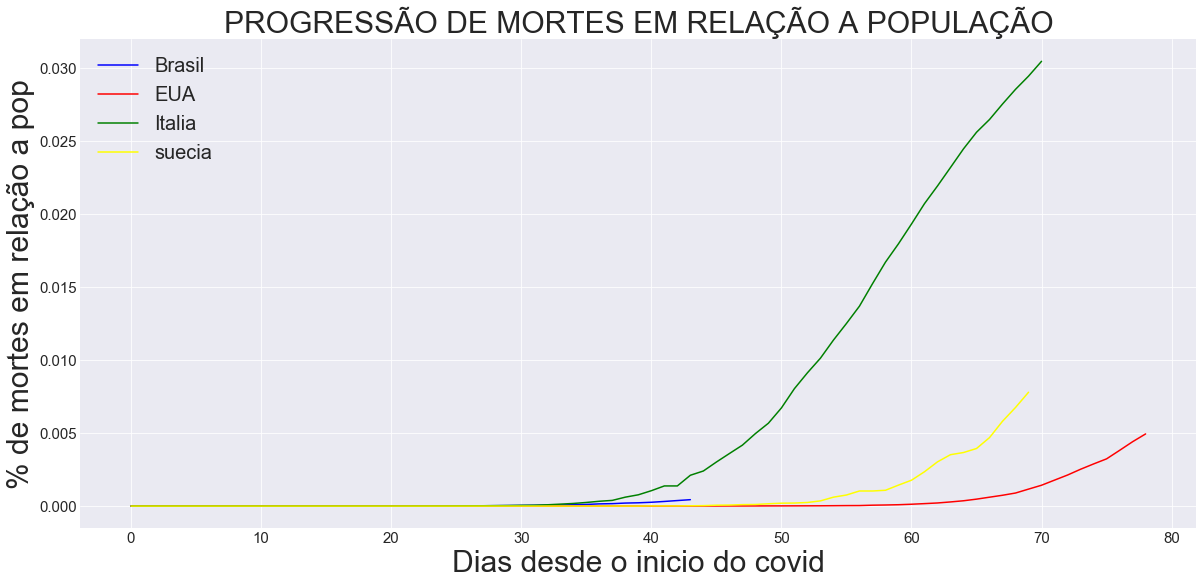

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de mortes em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Quando vemos as mortes em relacao a % de populacao reparamos algumas coisas


*   A italia ainda eh disparada na frente com mais numeros de mortes
*   A suecia vem na frente do Brasil e EUA
*   O Brasil esta crescendo de forma mais rapida que os EUA e a Suecia
*   Suecia e EUA estao em sua curva de crescimento





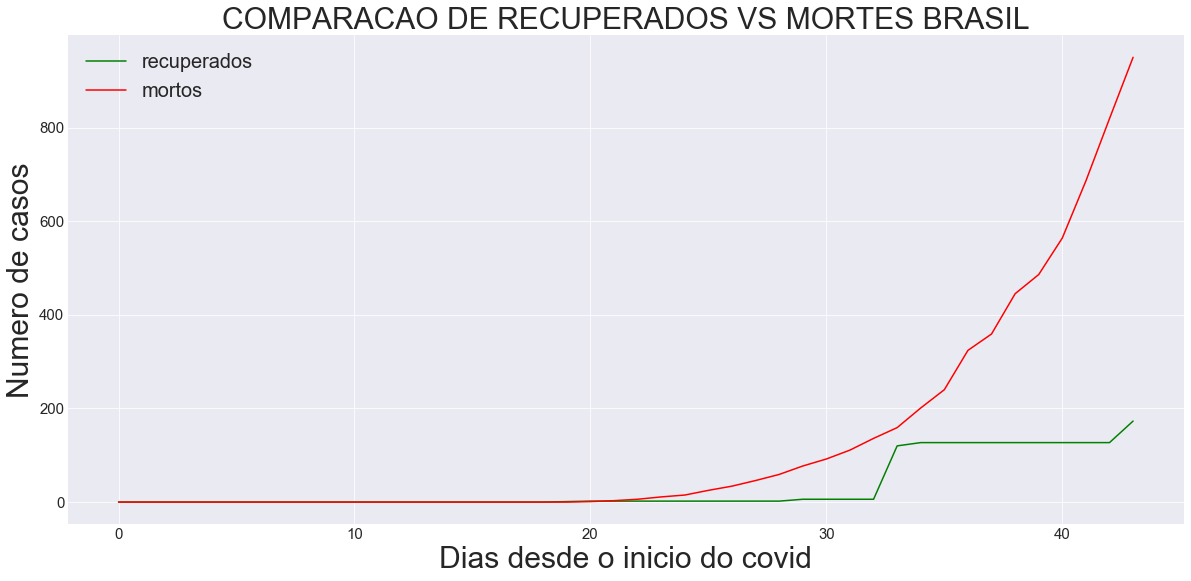

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, color='green')
plt.plot(dias_brasil, mortes_brasil, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES BRASIL', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


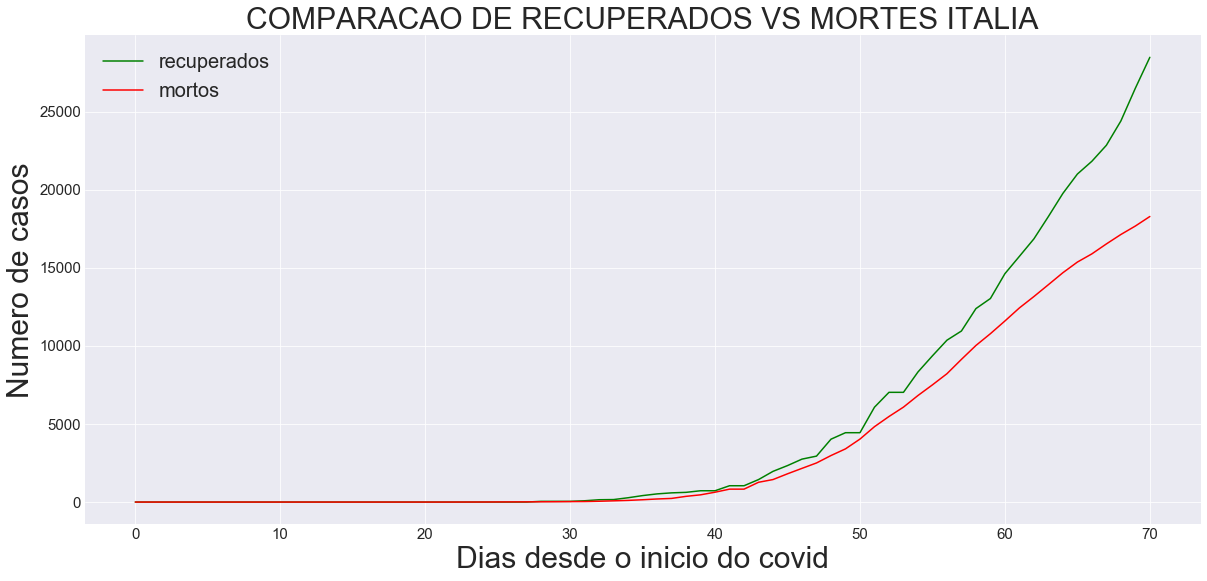

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, color='green')
plt.plot(dias_italia, mortes_italia, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


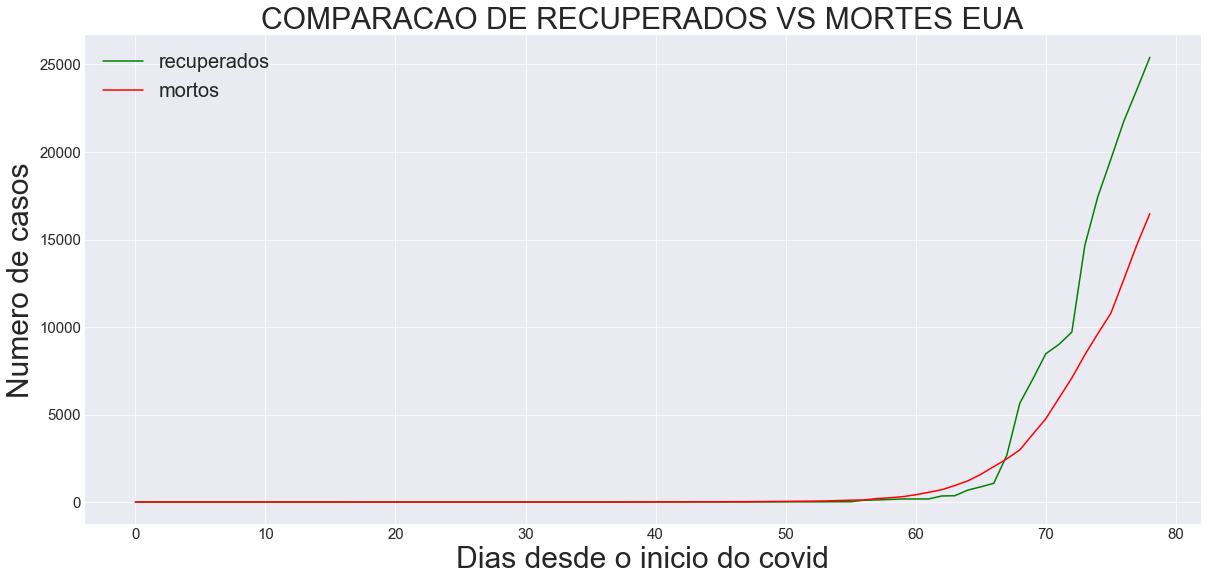

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, color='green')
plt.plot(dias_eua, mortes_eua, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


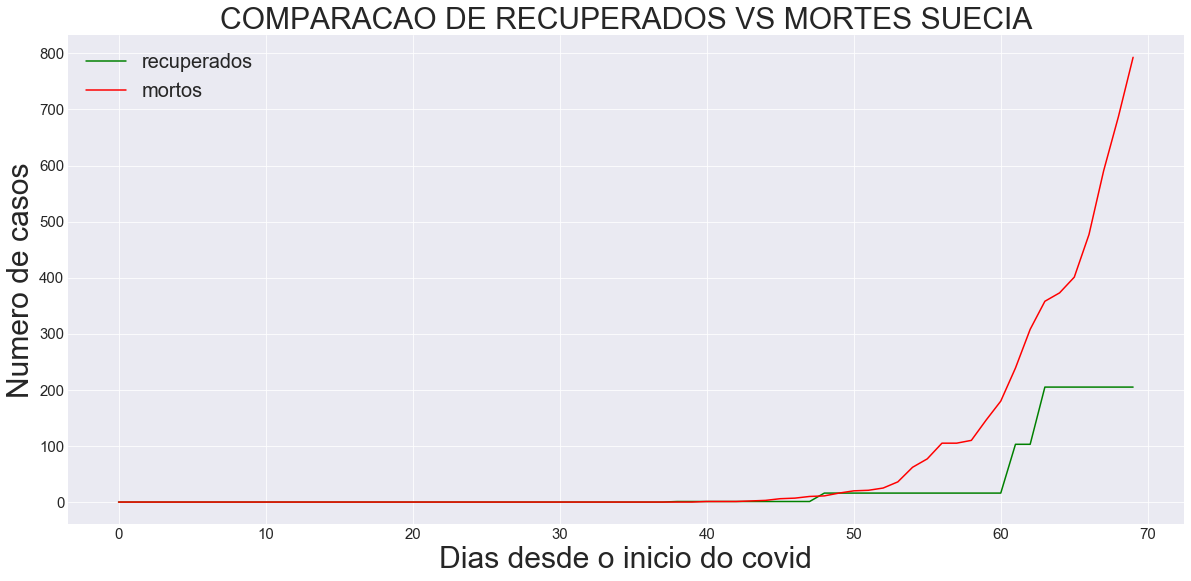

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Como podemos ver, nos paises que ja tiveram sua curva de crescimento mais acentuada, o numero de curados ultrapassa o numero de mortos, enquanto em paises como Brasil e Suecia que ainda nao chegou nessa curva de crescimento, o numero de mortes e maior que o de recuperados, inclusive o numero de recuperados chega a se estabilizar.
A suecia parece ser muito igual ao brasil em todos os casos, mortes, casos confirmados, e recuperados

# PREVISOES

Nesta secao nos aplicaremos o algoritmo SVR do sklearn para tentar prever o numero de mortes, casos e recuperados dos 4 paises nos proximos 40 dias.


---

OBS: OS CASOS DE MORTES  DO BRASIL ESTA SENDO OTIMIZADOS PARA DIMINUIR O ERRO
TODAS AS 2  PREVISÕES PARA OS OUTROS PAISES TAMBEM ESTAO SENDO OTIMIZADAS EM OUTRO ARQUIVO PARA DIMINUIR O ERRO, ISSO PODERA DEMORAR ALGUNS DIAS, CASO QUEIRA O MAIS OTIMIZADO PARA OUTROS PAISES RETORNE OUTRO DIA

In [0]:
#separando o target(valor a ser previsto) das datas
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
#COMECAREMOS PELO BRASIL:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)

In [0]:
params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_br = svm.predict(futuro_brasil)

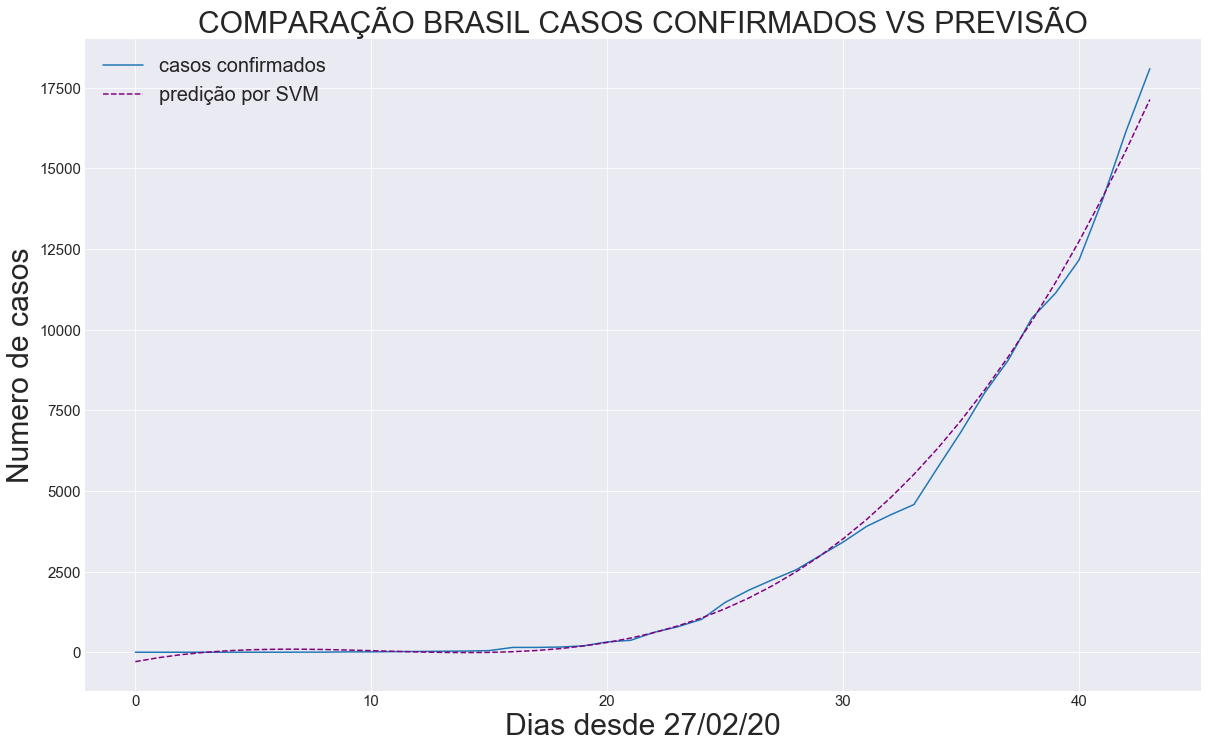

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil)
plt.plot(futuro_brasil[0:44],pred_caso_br[0:44], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortes brasil
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)

params = {'C': [10], 'coef0': [0.0, 3.0], 'epsilon': [0.01], 'gamma': [0.1], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[True]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10], 'coef0': [0.0, 3.0], 'epsilon': [0.01],
                         'gamma': [0.1], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_br = svm.predict(futuro_brasil)

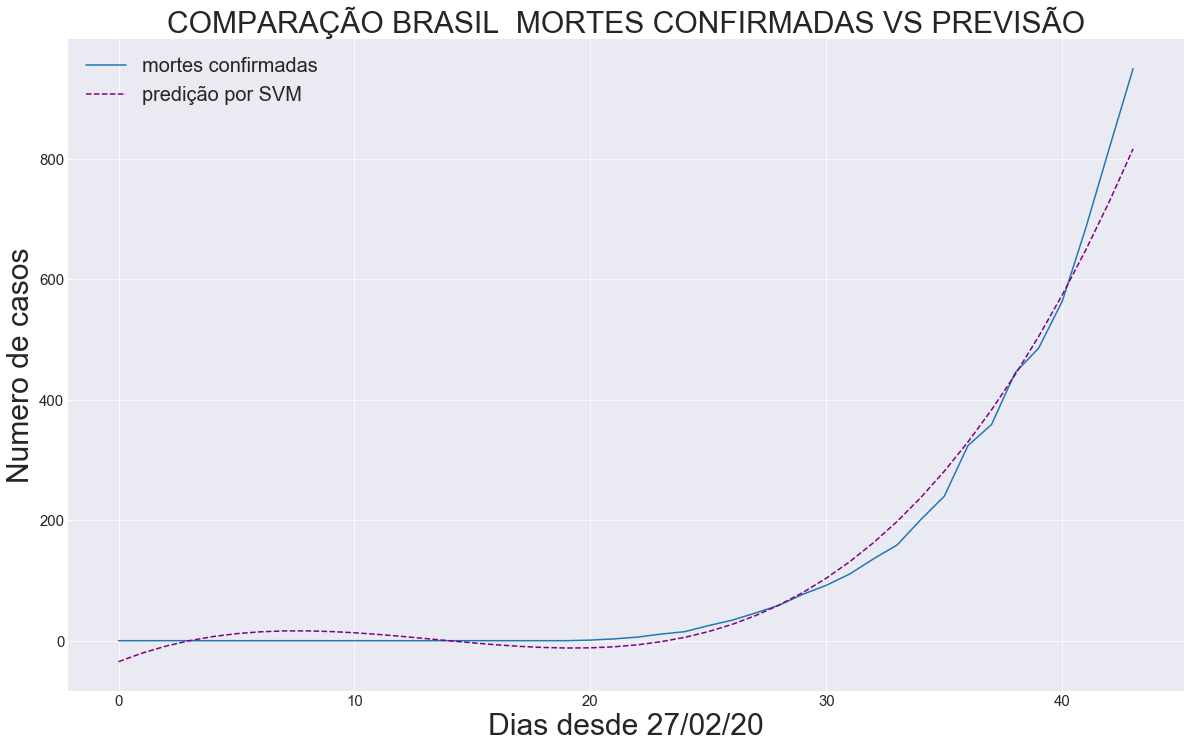

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil)
plt.plot(futuro_brasil[0:44], pred_mortes_br[0:44], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL  MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao casos EUA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_eua, target_confirmado_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_eua = svm.predict(futuro_eua)

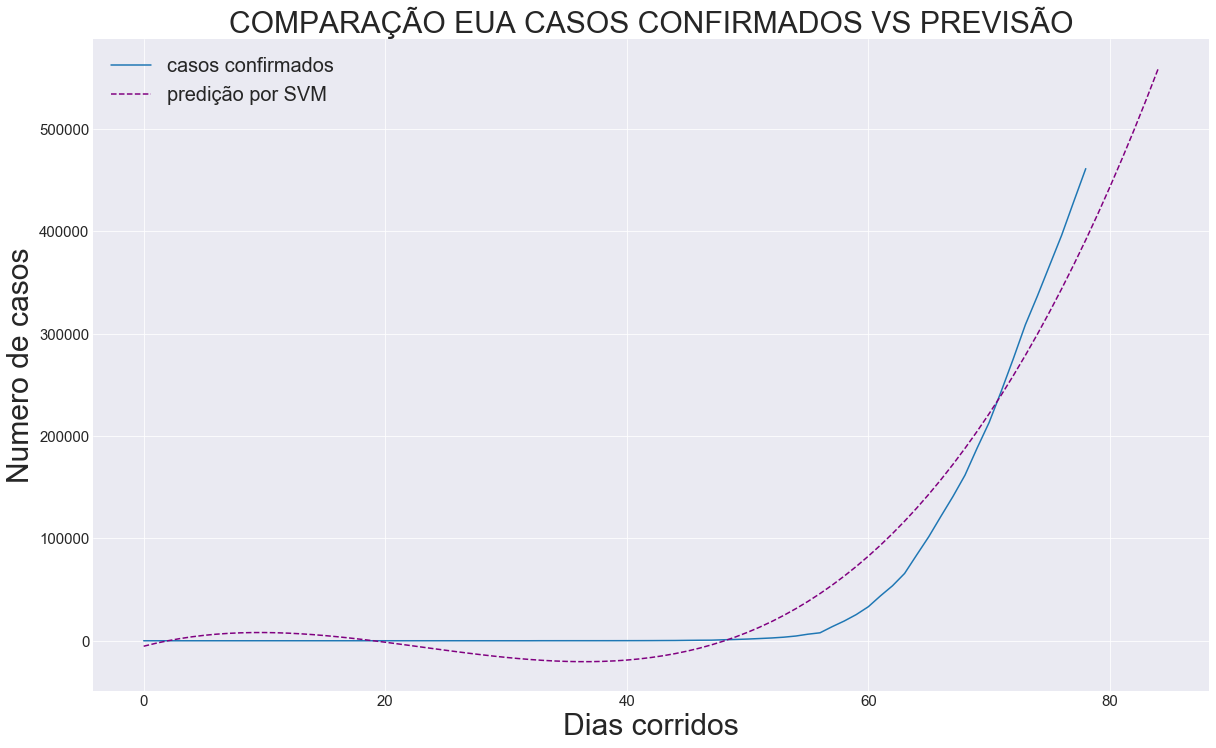

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua)
plt.plot(futuro_eua[0:85],pred_caso_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortos EUA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_eua, target_mortos_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 38.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_eua = svm.predict(futuro_eua)

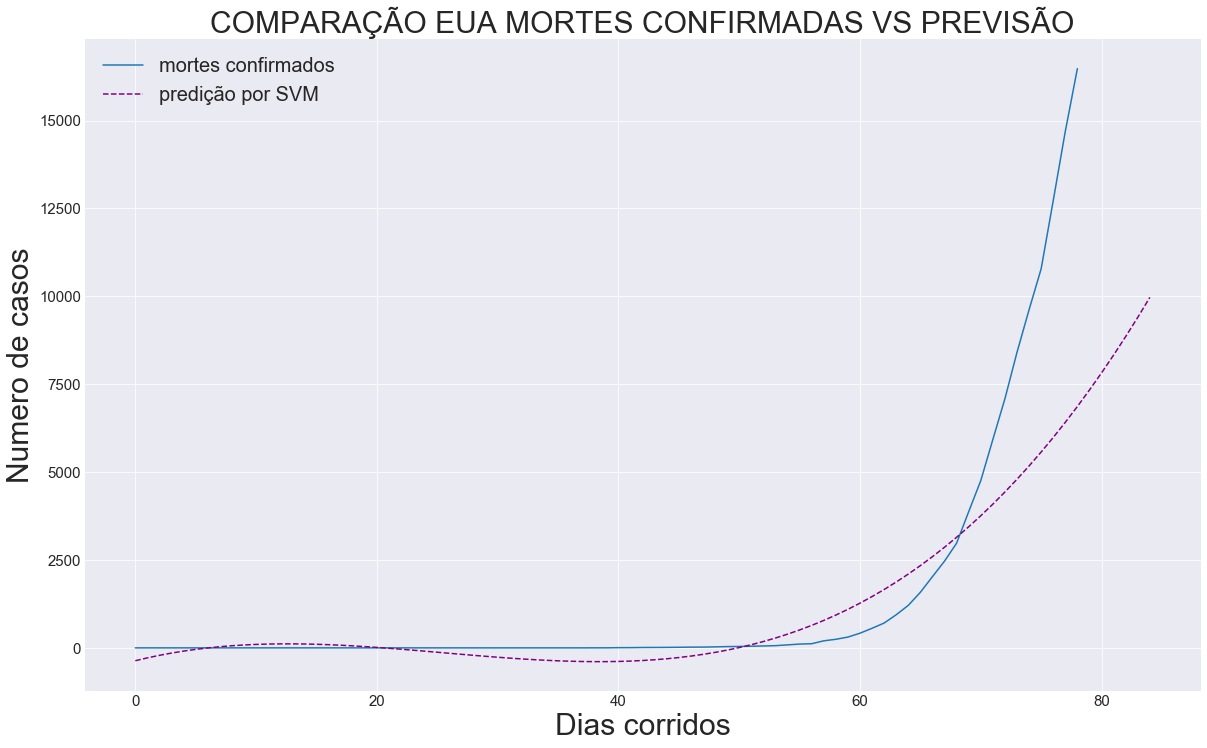

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua)
plt.plot(futuro_eua[0:85],pred_mortes_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [0]:
# predicao casos ITALIA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_italia, target_confirmado_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 14.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_italia = svm.predict(futuro_italia)

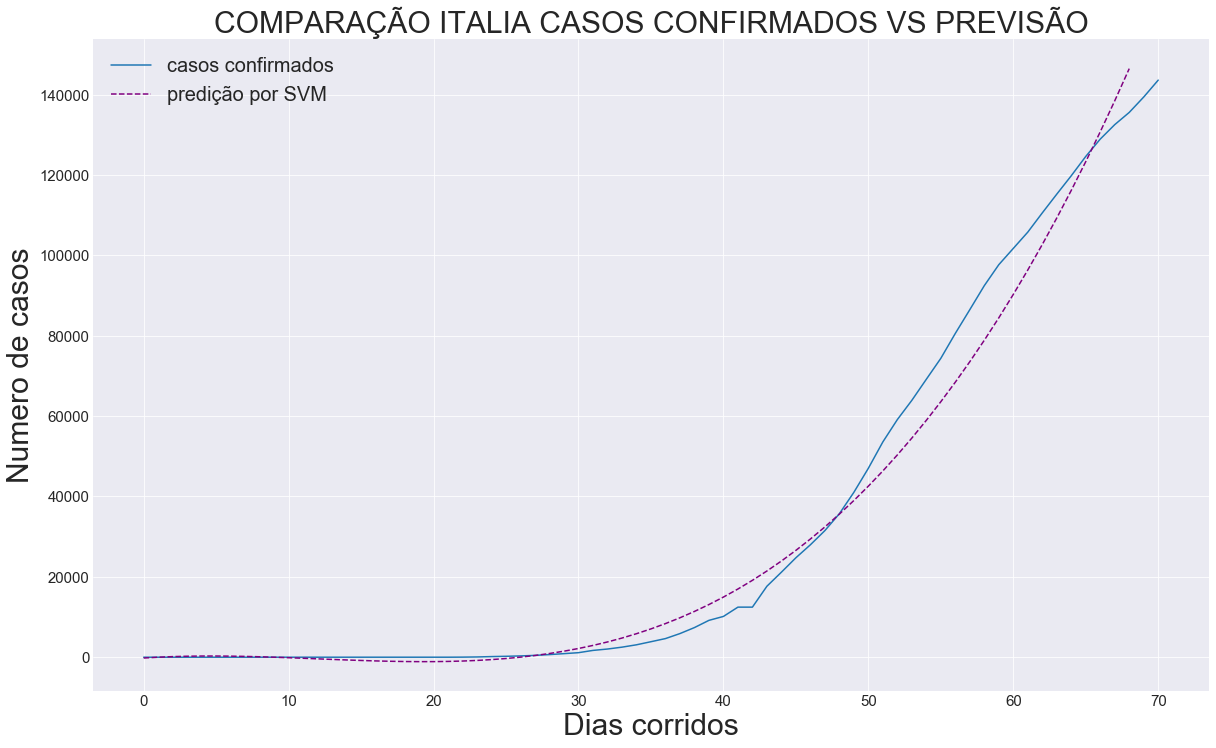

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia)
plt.plot(futuro_italia[0:69],pred_caso_italia[0:69], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortos ITALIA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_italia, target_mortos_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_italia = svm.predict(futuro_italia)

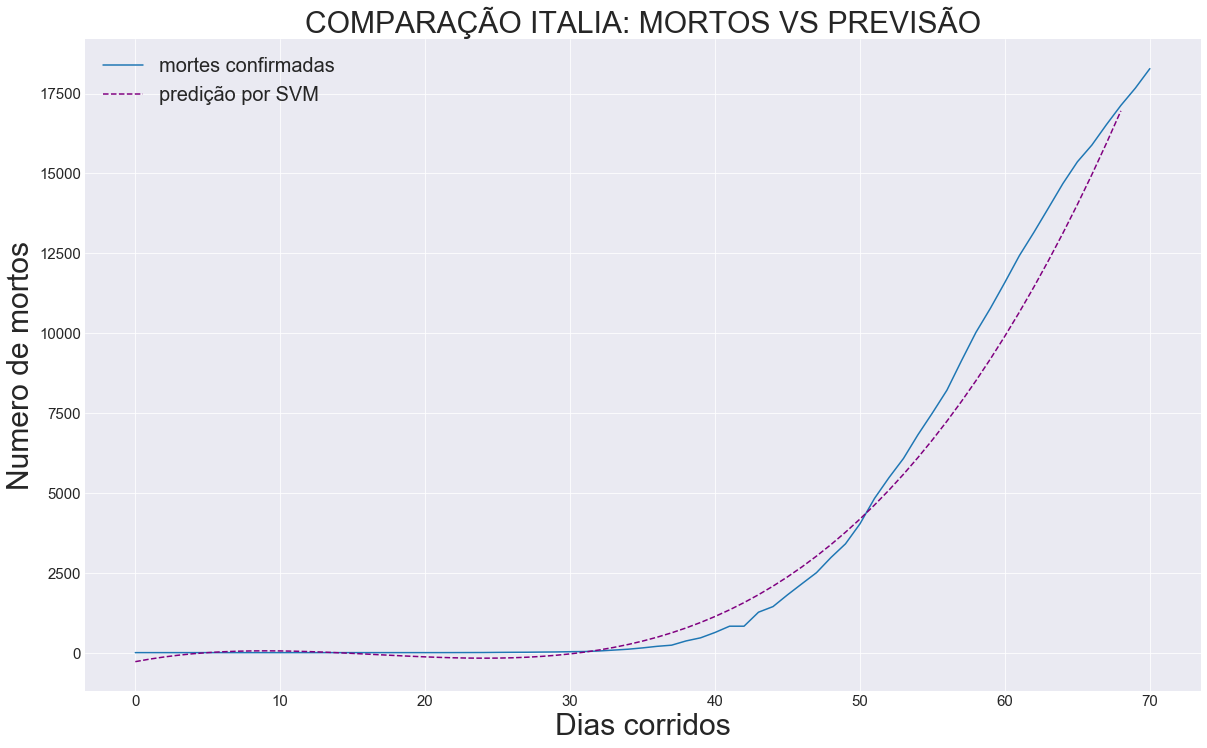

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia)
plt.plot(futuro_italia[0:69],pred_mortes_italia[0:69], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA: MORTOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
 # predicao casos SUECIA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_suecia, target_confirmado_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 49.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_suecia = svm.predict(futuro_suecia)

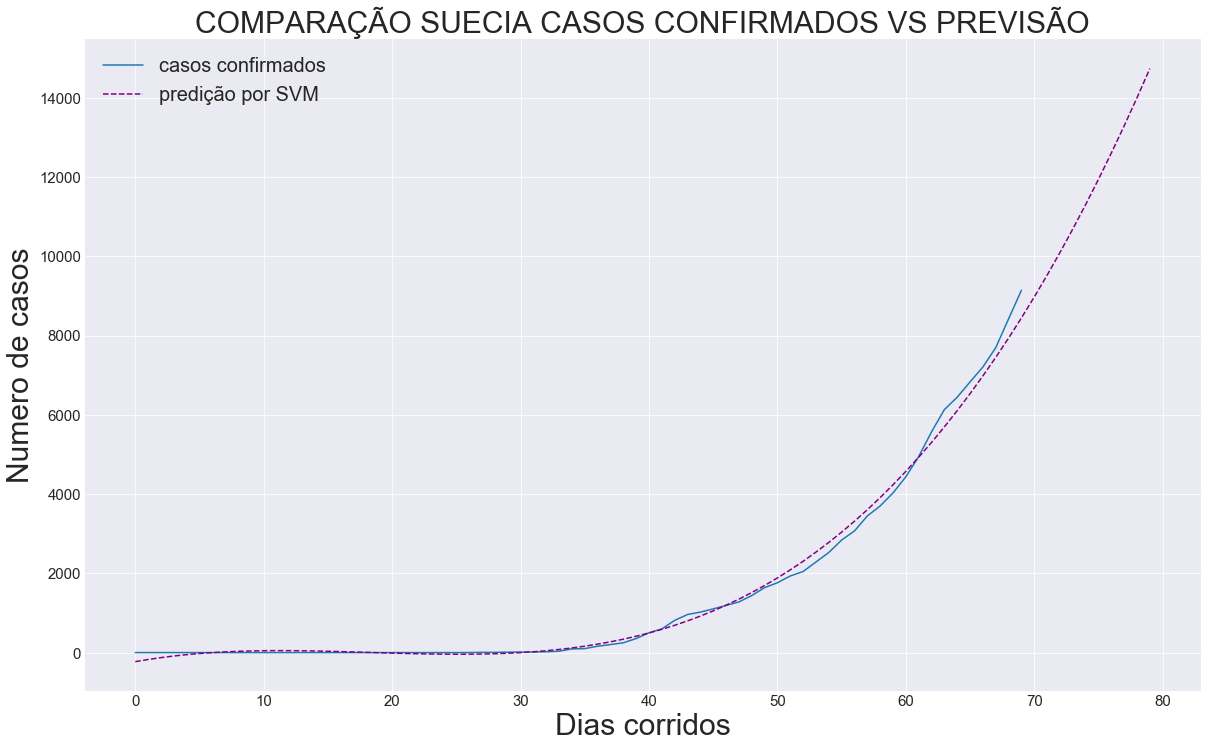

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia)
plt.plot(futuro_suecia[0:80],pred_caso_suecia[0:80], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
 # predicao MORTES SUECIA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_suecia, target_mortos_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 73.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_suecia = svm.predict(futuro_suecia)

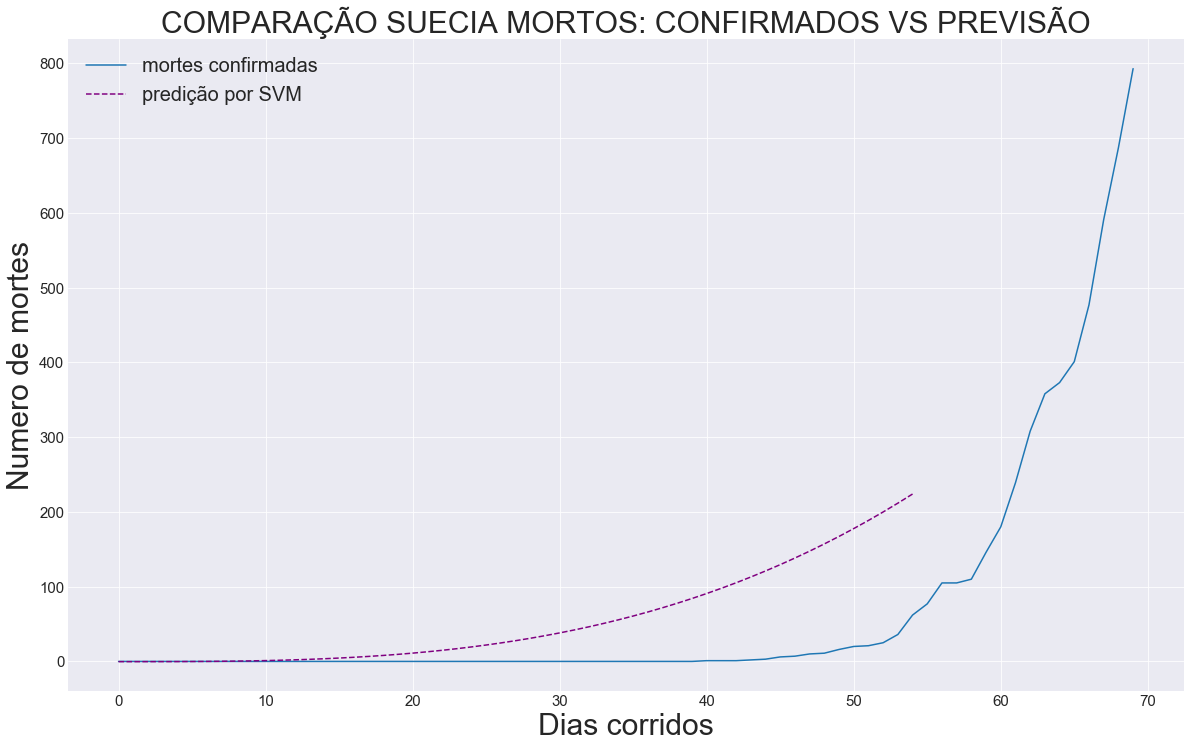

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia)
plt.plot(futuro_suecia[0:55],pred_mortes_suecia[0:55], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA MORTOS: CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# APRESENTAÇÃO DE RESULTADOS

Nesta secao construiremos 8 dataframes, um de casos confirmados e um de mortes para cada pais. Nesses dataframes nos teremos os casos oficiais e os que nosso programa previu, e ele sera atualizado diretamente.
Alem desses dataframes iremos refazer os graficos feitos na secao de graficos, porem agora com as previsoes, para ver se o cenario dos paises mudam em relaçao um ao outro 

In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [i for i in pred_caso_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
df_caso_br = pd.DataFrame([previsto[40:], casos_brasil[40:], diferenca[40:]], columns=colunas[40:], index = ['previsoes', 'real', 'diferenca'])


Abaixo a media de erro de nossa previsao para oS casos confirmados do  brasil e a tabela com as previsoes, casos reais e a diferenca entre os dois.
por se tratar de previsoes, ha tabelas que nao ha diferencas ainda, pois nosso programa preve 40 dias a frente. ARRASTE A BARRA DE ROLAGEM DAS TABELAS PARA VER OS DIAS FUTUROS.
ordem das tabelas:


1.  Confirmados Brasil
2.  Mortos Brasil
3.  Confirmados EUA
4.  Mortos EUA
5.  Confirmados Italia
6.  Mortos Italia
7.  Confirmados Suecia
8.  Mortos Suecia











In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O BRASIL FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O BRASIL FOI : 178.88636363636363


In [0]:
print('CASOS CONFIRMADOS PARA O BRASIL: ')
pd.set_option('display.max_columns', 250)
df_caso_br

CASOS CONFIRMADOS PARA O BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,12740.359572,14110.420944,15574.088806,17134.410695,18794.434149,20557.206708,22425.775907,24403.189286,26492.494382,28696.738734,31018.969879,33462.235356,36029.582701,38724.059455,41548.713153,44506.591335,47600.741538,50834.211301,54210.048161,57731.299656,61401.013324,65222.236705,69198.017334,73331.402748,77625.440491,82083.178095,86707.663102,91501.943046,96469.065469,101612.077906,106934.027898,112437.962979,118126.93069,124003.978568,130072.15415,136334.504976,142794.078583,149453.92251,156317.084295,163386.611471,170665.551584,178156.952166,185863.860759,193789.324899
real,12161.000000,14034.000000,16170.000000,18092.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,579.000000,76.000000,-596.000000,-958.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [i for i in pred_mortes_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
df_morto_br = pd.DataFrame([previsto[40:], mortes_brasil[40:], diferenca[40:]], columns=colunas[40:], index = ['previsoes', 'real', 'diferenca'])


In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO DE MORTES  PARA O BRASIL FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO DE MORTES  PARA O BRASIL FOI : 178.88636363636363


In [0]:
print('MORTES PARA O BRASIL: ')
df_morto_br

MORTES PARA O BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,574.476142,649.273833,729.971467,816.782923,909.922079,1009.602813,1116.039004,1229.444529,1350.033267,1478.019095,1613.615893,1757.037538,1908.497907,2068.210881,2236.390335,2413.25015,2599.004202,2793.86637,2998.050533,3211.770567,3435.240352,3668.673766,3912.284687,4166.286992,4430.89456,4706.32127,4992.780999,5290.487626,5599.655028,5920.497084,6253.227672,6598.06067,6955.209956,7324.889409,7707.312906,8102.694326,8511.247547,8933.186446,9368.724904,9818.076796,10281.456001,10759.076399,11251.151866,11757.896281
real,564.000000,686.000000,819.000000,950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,10.000000,-37.000000,-90.000000,-134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [i for i in pred_caso_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
df_caso_eua = pd.DataFrame([previsto[75:], casos_eua[75:], diferenca[75:]], columns=colunas[75:], index = ['previsoes', 'real', 'diferenca'])


In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O ESTADOS UNIDOS  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O ESTADOS UNIDOS  FOI : 18845.0


In [0]:
print('CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: ')
df_caso_eua

CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,321346.247243,343892.405669,367367.404542,391788.782084,417174.076688,443540.826501,470906.569882,499288.845124,528705.190484,559173.144265,590710.244756,623334.030213,657062.038972,691911.809224,727900.879369,765046.78761,803367.072244,842879.271592,883600.923917,925549.567506,968742.740624,1.013198e+06,1.058933e+06,1.105965e+06,1.154311e+06,1.203990e+06,1.255019e+06,1.307415e+06,1.361196e+06,1.416379e+06,1.472982e+06,1.531023e+06,1.590518e+06,1.651486e+06,1.713944e+06,1.777910e+06,1.843401e+06,1.910434e+06,1.979028e+06,2.049200e+06,2.120966e+06,2.194346e+06,2.269356e+06,2.346014e+06
real,366667.000000,396223.000000,429052.000000,461437.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-45321.000000,-52331.000000,-61685.000000,-69649.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [i for i in pred_mortes_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
df_morto_eua = pd.DataFrame([previsto[75:], mortes_eua[75:], diferenca[75:]], columns=colunas[75:], index = ['previsoes', 'real', 'diferenca'])


In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA MORTES DO ESTADOS UNIDOS  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA MORTES DO ESTADOS UNIDOS  FOI : 805.0


In [0]:
print('MORTES PARA OS ESTADOS UNIDOS: ')
df_morto_eua

MORTES PARA OS ESTADOS UNIDOS: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,5571.375362,5985.180003,6416.888957,6866.856746,7335.437831,7822.986629,8329.857646,8856.40536,9402.984218,9969.94868,10557.653194,11166.452281,11796.700389,12448.751979,13122.961513,13819.683406,14539.272243,15282.082362,16048.468318,16838.784511,17653.385585,18492.625758,19356.859615,20246.441646,21161.726253,22103.067958,23070.821193,24065.34045,25086.980159,26136.094844,27213.038936,28318.166957,29451.833217,30614.39236,31806.198756,33027.60696,34278.971278,35560.646205,36872.986415,38216.346156,39591.080043,40997.542506,42436.087794,43907.070766
real,10783.000000,12722.000000,14695.000000,16478.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-5212.000000,-6737.000000,-8279.000000,-9612.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [i for i in pred_caso_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
df_caso_italia = pd.DataFrame([previsto[67:], casos_italia[67:], diferenca[67:]], columns=colunas[67:], index = ['previsoes', 'real', 'diferenca'])

In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA ITALIA  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA ITALIA  FOI : 3776.8591549295775


In [0]:
print('CASOS CONFIRMADOS PARA A ITALIA: ')
df_caso_italia

CASOS CONFIRMADOS PARA A ITALIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,138478.35187,146484.042666,154785.930147,163389.30189,172299.44546,181521.648424,191061.198344,200923.382784,211113.489306,221636.805476,232498.618883,243704.217074,255258.887621,267167.918085,279436.596026,292070.209017,305074.044604,318453.390398,332213.533938,346359.762774,360897.364504,375831.626665,391167.836855,406911.28261,423067.251528,439641.0311,456637.908999,474063.172716,491922.109804,510220.007906,528962.154558,548153.837282,567800.343661,587906.961336,608478.97774,629521.680575,651040.357271,673040.295504,695526.782839,718505.106722,741980.554873,765958.414736,790443.973971,815442.520052
real,132547.00000,135586.000000,139422.000000,143626.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,5931.00000,10898.000000,15363.000000,19763.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [i for i in pred_mortes_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
df_morto_italia = pd.DataFrame([previsto[67:], mortes_italia[67:], diferenca[67:]], columns=colunas[67:], index = ['previsoes', 'real', 'diferenca'])

In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA MORTES DA ITALIA FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA MORTES DA ITALIA FOI : 437.4366197183099


In [0]:
print('MORTES CONFIRMADOS DA ITALIA: ')
df_morto_italia

MORTES CONFIRMADOS DA ITALIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,15939.348764,16956.010576,18013.848413,19113.662073,20256.251322,21442.415964,22672.95582,23948.670648,25270.360254,26638.824411,28054.862955,29519.275644,31032.862314,32596.422693,34210.756632,35876.663904,37594.944299,39366.397623,41191.823663,43072.02218,45007.793039,46999.935983,49049.250803,51156.537271,53322.595255,55548.224558,57834.224832,60181.396036,62590.537821,65062.450113,67597.932565,70197.785104,72862.807474,75593.799387,78391.5608,81256.891428,84190.591013,87193.45936,90266.296304,93409.901682,96625.075205,99912.616678,103273.325968,106708.002756
real,16523.000000,17127.000000,17669.000000,18279.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-584.000000,-171.000000,344.000000,834.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [i for i in pred_caso_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
df_caso_suecia = pd.DataFrame([previsto[66:], casos_suecia[66:], diferenca[66:]], columns=colunas[66:], index = ['previsoes', 'real', 'diferenca'])

In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA SUECIA  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA SUECIA  FOI : 110.2


In [0]:
print('CASOS CONFIRMADOS PARA A SUECIA: ')
df_caso_suecia

CASOS CONFIRMADOS PARA A SUECIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,6980.867708,7448.316618,7935.736929,8443.537962,8972.129065,9521.919546,10093.318674,10686.735872,11302.580435,11941.261648,12603.188871,13288.77146,13998.418653,14732.539846,15491.544355,16275.841513,17085.84062,17921.950972,18784.581991,19674.142912,20591.043112,21535.691893,22508.498625,23509.872557,24540.223051,25599.959471,26689.491072,27809.227262,28959.577284,30140.950483,31353.756254,32598.403852,33875.30261,35184.861891,36527.490995,37903.599211,39313.595961,40757.89044,42236.892134,43751.010221,45300.654112,46886.233107,48508.156553,50166.833631
real,7206.000000,7693.000000,8419.000000,9141.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-226.000000,-245.000000,-484.000000,-698.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [i for i in pred_mortes_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
df_morto_suecia = pd.DataFrame([previsto[66:], mortes_suecia[66:], diferenca[66:]], columns=colunas[66:], index = ['previsoes', 'real', 'diferenca'])

In [0]:
diferenca = np.array(diferenca)
print(f'A MEDIA DE ERRO PARA MORTES DA SUECIA FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA MORTES DA SUECIA FOI : 67.2


In [0]:
print('MORTES SUECIA: ')
df_morto_suecia

MORTES SUECIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20
previsoes,409.101652,427.994596,447.46002,467.506437,488.142423,509.376524,531.217252,553.673185,576.752851,600.464811,624.817579,649.819715,675.47978,701.806287,728.807798,756.492857,784.870023,813.947813,843.734769,874.239469,905.470426,937.436216,970.145322,1003.606382,1037.827818,1072.818296,1108.586301,1145.140379,1182.489072,1220.640958,1259.604551,1299.388364,1340.001035,1381.450986,1423.746885,1466.897184,1510.910459,1555.795255,1601.560117,1648.213621,1695.76428,1744.220579,1793.591184,1843.884519
real,477.000000,591.000000,687.00000,793.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-68.000000,-164.000000,-240.00000,-326.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


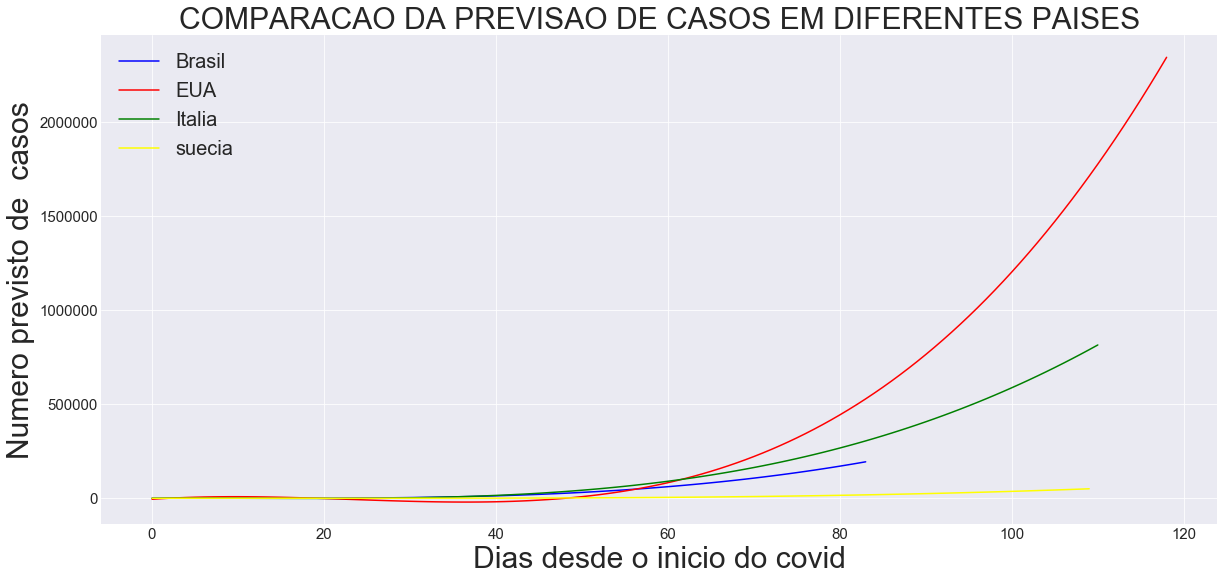

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARACAO DA PREVISAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero previsto de  casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


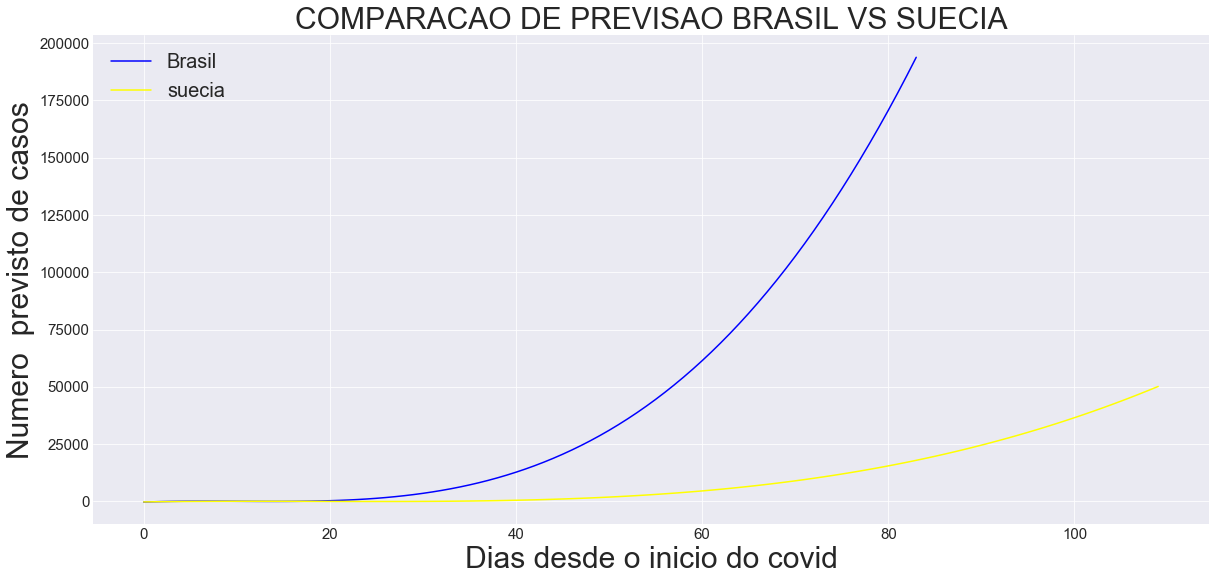

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')


plt.title('COMPARACAO DE PREVISAO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero  previsto de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


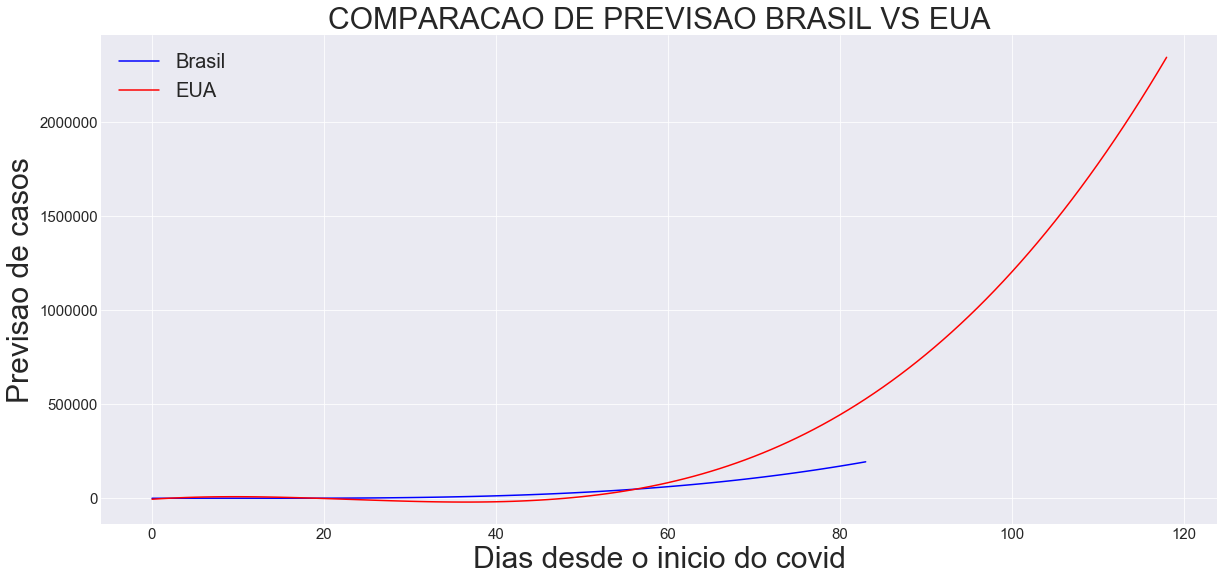

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')

plt.title('COMPARACAO DE PREVISAO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


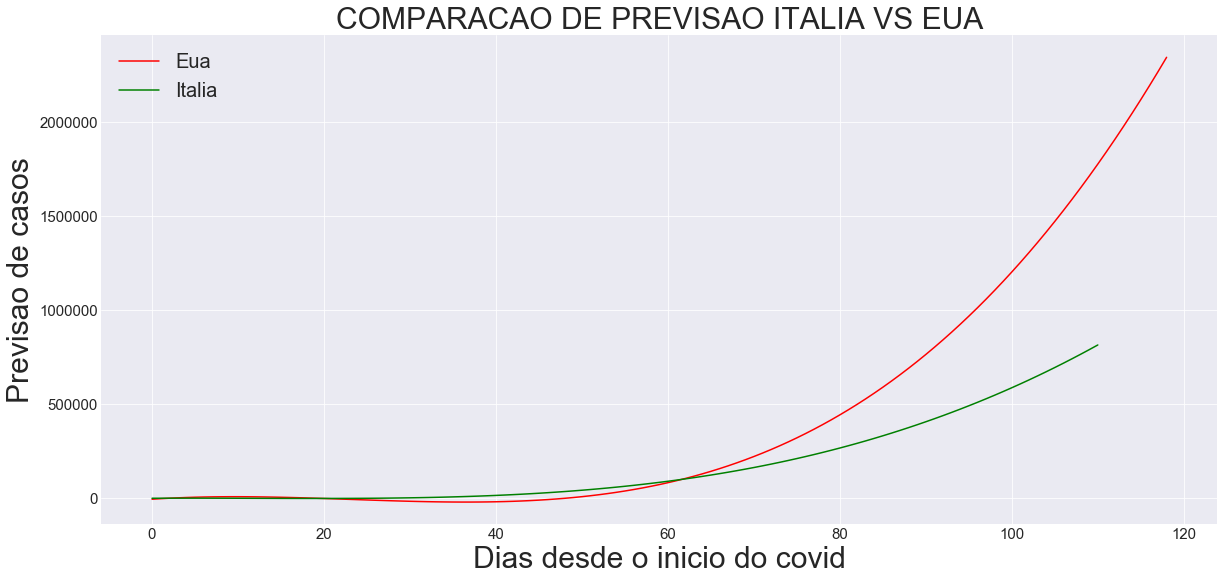

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')


plt.title('COMPARACAO DE PREVISAO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Eua', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


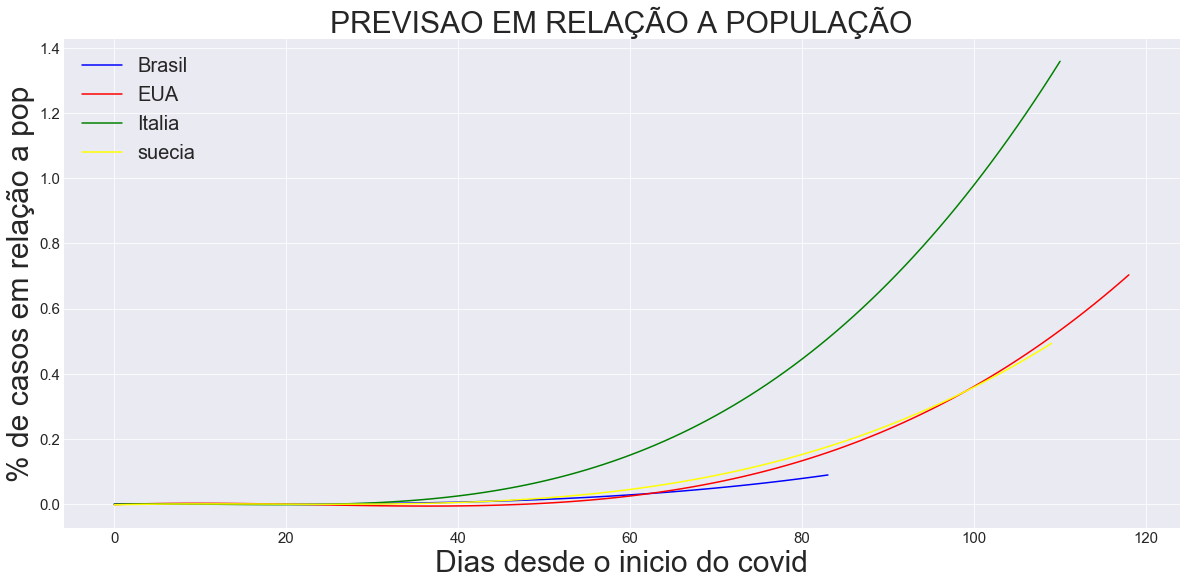

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PREVISAO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


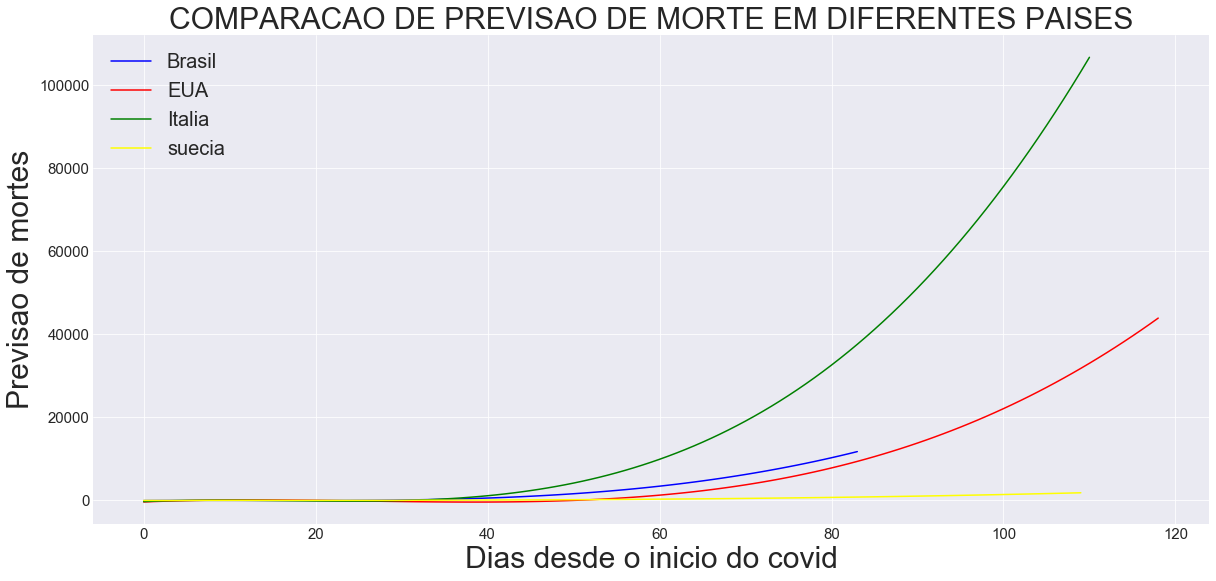

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO DE PREVISAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


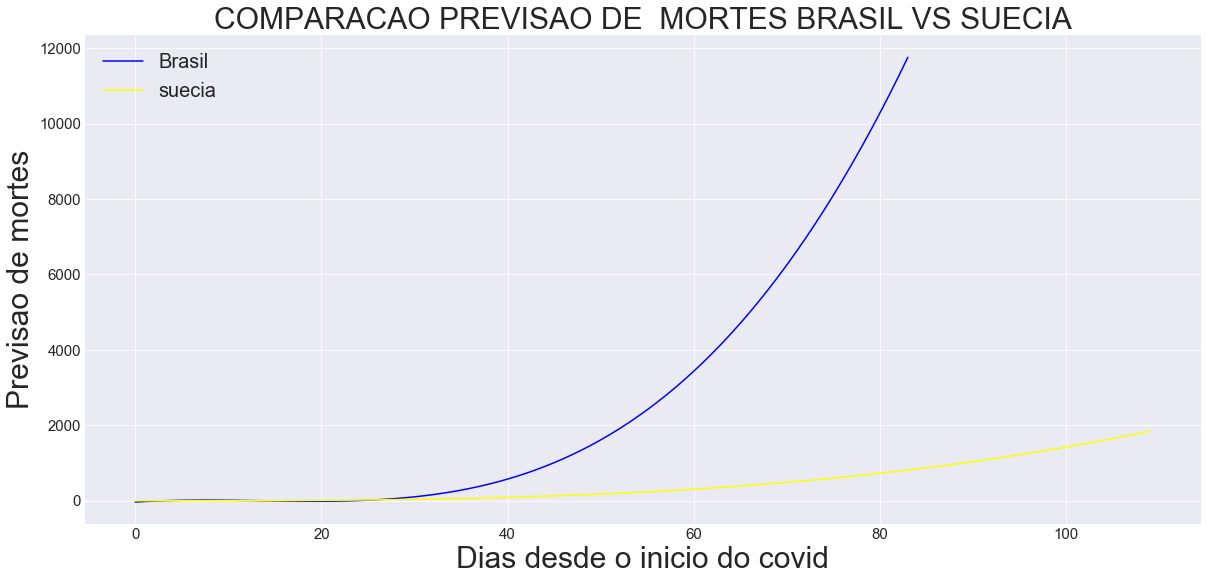

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO PREVISAO DE  MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


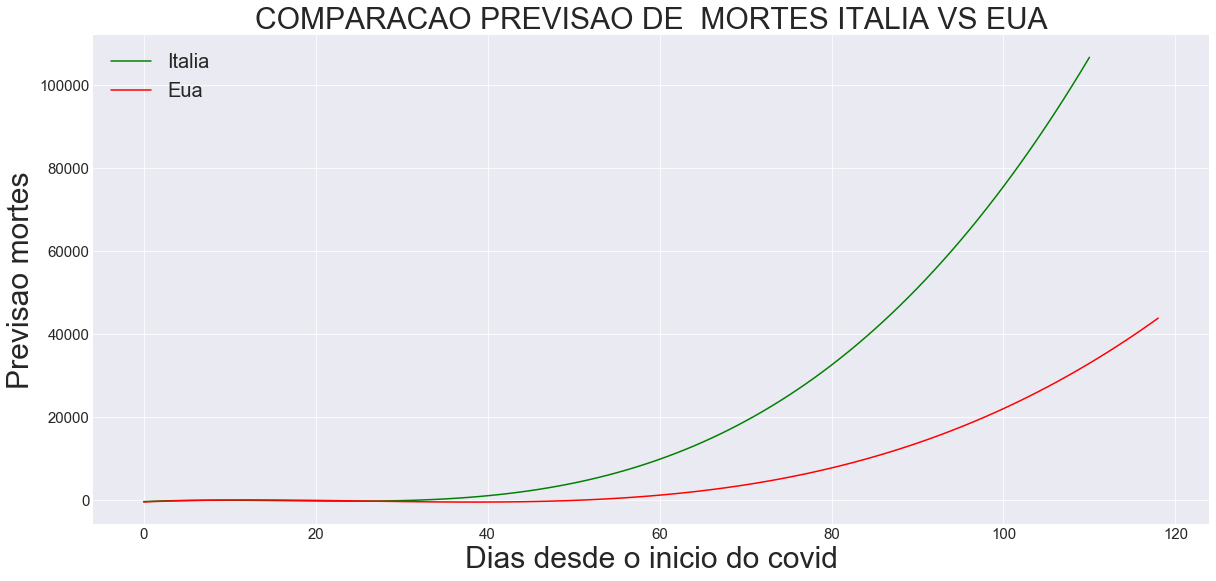

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


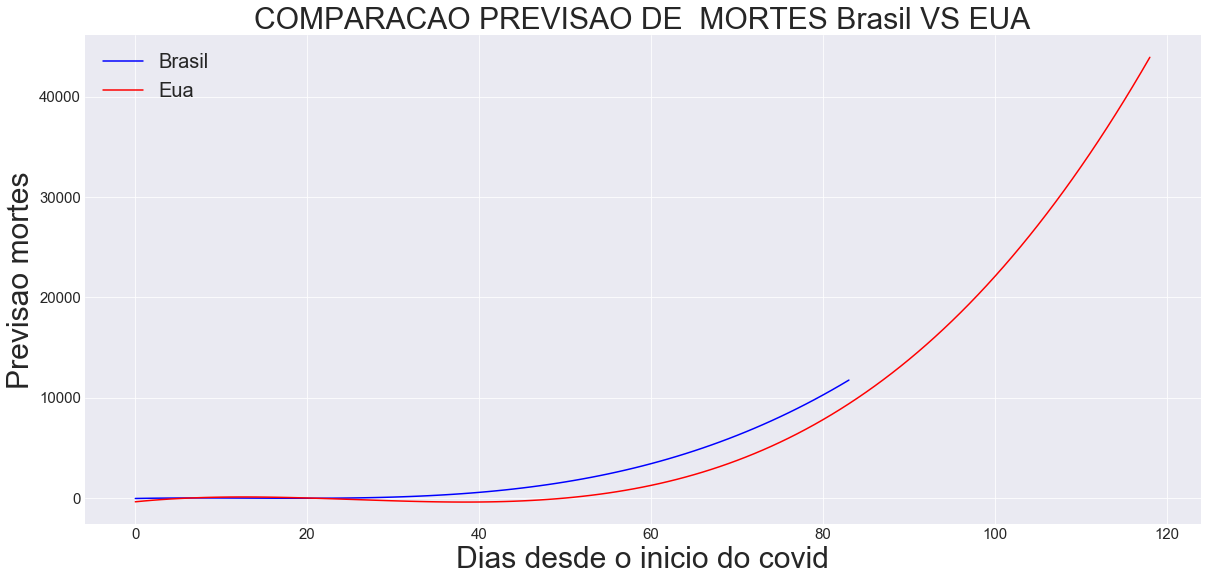

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES Brasil VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Brasil', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


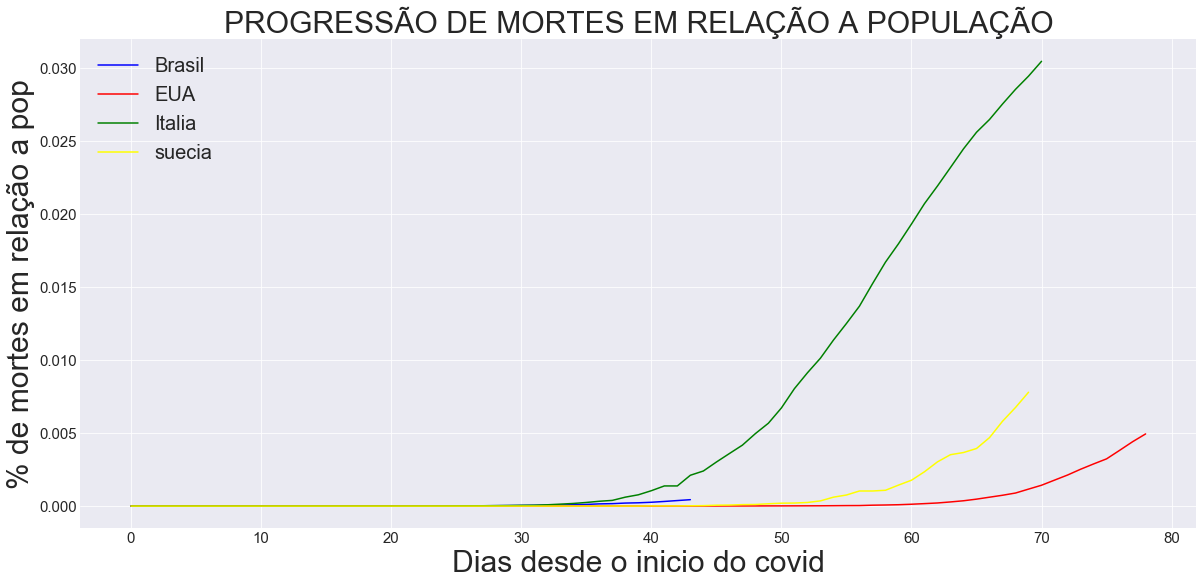

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de mortes em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()
